<a href="https://colab.research.google.com/github/AntonioLunardi/Loan-Prediction-AV-Competition-Case/blob/main/Bank_loan_classification_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install graphviz==0.9
!apt-get install graphviz

## 1.1 Used libraries

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import get_dummies
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

## 1.2 Aleatory seed

In [ ]:
# Standardizing random parameters for obtaining constant results
SEED = 452

# 1.0 Data cleaning

## 1.1 Initial exploring and cleaning

In [8]:
# Read the dataframe
df = pd.read_csv('/content/df1_loan.csv')

In [9]:
# Check the number of columns and rows
df.shape

(500, 15)

In [10]:
#  Data frame first look
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


This is appearently a cleaned and ordered data frame. Although it is necessary to do tests to check if all registers are consistent

In [11]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

The index column is already present

## 1.2 Checking if there is any duplicated loan id

In [12]:
# Count duplicate on 'Loan_ID' column
df.duplicated(subset=['Loan_ID']).sum()

0

The dataframe doesn't have any duplicated register of loan

## 1.3 Removing unecessary column

In [13]:
# Remove the index column considering pandas generates it automatically
df = df.drop(columns=['Unnamed: 0'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,LP002587,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,LP002600,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


## 1.4 Removing non numerical characters from column

In [14]:
df['Total_Income'] = df['Total_Income'].str.replace('$','')
df['Total_Income'].head(5)

<ipython-input-14-fa80c422c83d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total_Income'] = df['Total_Income'].str.replace('$','')


0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: object

## 1.5 Replacing NaNs

In [15]:
# Checking number of NaNs
df.apply(lambda x: x.isnull().value_counts())


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
False,500.0,491,497,488,500.0,473,500.0,500.0,482,486,459,500.0,500.0,500.0
True,NaN,9,3,12,NaN,27,NaN,NaN,18,14,41,NaN,NaN,NaN


In [16]:
# Filling NaN cells with -1 in order to handle them later
df = df.fillna('-1')
df.apply(lambda x: x.isnull().value_counts())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
False,500,500,500,500,500,500,500,500,500,500,500,500,500,500


Inicially all missing values are replaced by -1 in order to be treated for machine learning lately

## 1.6 Adjusting data types

In [17]:
# Checking df variable types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
Total_Income          object
dtype: object

In [18]:
# Changing 'Total_Income' type to float64 considering it should be treated as numerical
df['Total_Income'] = df['Total_Income'].astype(float)
df['Total_Income'].dtypes


dtype('float64')

In [19]:
# Changing 'CoapplicantIncome' type to stablish a standard in data
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df['ApplicantIncome'].dtypes

dtype('float64')

In [20]:
df['LoanAmount'] = df['LoanAmount'].astype(float)
df['LoanAmount'].dtypes

dtype('float64')

In [21]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(str)
df['Loan_Amount_Term'].dtypes

dtype('O')

In [22]:
# Changing 'Credit_history' to string for stardardization purposes considering that it is a categorical variable
df['Credit_History'] = df['Credit_History'].astype(str)
df['Credit_History'].dtypes

dtype('O')

## 1.7 Replacing NaNs proportionally

In [23]:
# Verify what are the categories and its quantities of each categorical column
# All of them are declared as object type columns
for i in range(0, len(df.columns)):
  if ((df.dtypes[i] == 'object') & (df.columns[i] != 'Loan_ID')): # ID column is not used because it is a unique identificator
    if (df[df.columns[i]].str.contains('-1').any()): # Test if category -1 is present in series in order to replace these cells
      print('\n\nCOLUMN: %s\n' % df.columns[i])
      print(df[df.columns[i]].value_counts())



COLUMN: Gender

Male      400
Female     91
-1          9
Name: Gender, dtype: int64


COLUMN: Married

Yes    322
No     175
-1       3
Name: Married, dtype: int64


COLUMN: Dependents

0     288
1      81
2      79
3+     40
-1     12
Name: Dependents, dtype: int64


COLUMN: Self_Employed

No     407
Yes     66
-1      27
Name: Self_Employed, dtype: int64


COLUMN: Loan_Amount_Term

360.0    415
180.0     35
-1        14
300.0     12
480.0     12
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64


COLUMN: Credit_History

1.0    387
0.0     72
-1      41
Name: Credit_History, dtype: int64


In [24]:
# Verify what are the proportions and categories of each categorical column
# All of them are declared as object type columns
for i in range(0, len(df.columns)):
  if ((df.dtypes[i] == 'object') & (df.columns[i] != 'Loan_ID')): # ID column is not used because it is a unique identificator
    if (df[df.columns[i]].str.contains('-1').any()): # Test if category -1 is present in series in order to replace these cells
      
      calculation_df = pd.DataFrame(df[df.columns[i]].value_counts())
      calculation_df = calculation_df.drop('-1')# Drop '-1' index row from the calculation_df
      total_valid_elements = calculation_df[df.columns[i]].sum()
      proportion = []
      for index in range(0, len(calculation_df.index)): # Iterate for the calculation of proportion of each category of the data frame
        proportion.append(round(calculation_df.iloc[index][0]/total_valid_elements, 3))
      df[df.columns[i]] = df[df.columns[i]].str.replace('-1',(np.random.choice(calculation_df.index, p=proportion))) # Change this creation to itarative method and not unique
      print('\n\nCOLUMN: %s\n' % df.columns[i])
      print(calculation_df.index)
      print(df[df.columns[i]].value_counts())
      print(proportion)



COLUMN: Gender

Index(['Male', 'Female'], dtype='object')
Male      400
Female    100
Name: Gender, dtype: int64
[0.815, 0.185]


COLUMN: Married

Index(['Yes', 'No'], dtype='object')
Yes    325
No     175
Name: Married, dtype: int64
[0.648, 0.352]


COLUMN: Dependents

Index(['0', '1', '2', '3+'], dtype='object')
0     288
2      91
1      81
3+     40
Name: Dependents, dtype: int64
[0.59, 0.166, 0.162, 0.082]


COLUMN: Self_Employed

Index(['No', 'Yes'], dtype='object')
No     407
Yes     93
Name: Self_Employed, dtype: int64
[0.86, 0.14]


COLUMN: Loan_Amount_Term

Index(['360.0', '180.0', '300.0', '480.0', '120.0', '240.0', '60.0', '84.0',
       '36.0', '12.0'],
      dtype='object')
360.0    429
180.0     35
300.0     12
480.0     12
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64
[0.854, 0.072, 0.025, 0.025, 0.006, 0.006, 0.004, 0.004, 0.002, 0.002]


COLUMN: Credit_History

Index(['1.0', '0.0'], dtype='object')

# 2.0 Prepation for machine learning classification model

## 2.1 Dividing inputs and outputs from data frame

In [25]:
# Separation for training the classification models
model_inputs = df.drop(columns=['Loan_Status', 'Loan_ID'])
loan_status = df['Loan_Status']

## 2.1 Categorical columns dummyzation 

In [26]:
model_inputs.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Total_Income         float64
dtype: object

In [27]:
categorical_column_labels = []
for i in range(0, len(model_inputs.columns)):
  if ((model_inputs.dtypes[i] == 'object')):
    categorical_column_labels.append(model_inputs.columns[i])

categorical_column_labels

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [28]:
model_inputs = get_dummies(data=model_inputs, columns=categorical_column_labels)
model_inputs

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,-1.0,5849.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1,4583.0,1508.0,128.0,6091.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,3000.0,0.0,66.0,3000.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
3,2583.0,2358.0,120.0,4941.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
4,6000.0,0.0,141.0,6000.0,0,1,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3326.0,913.0,105.0,4239.0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,1,0
496,2600.0,1700.0,107.0,4300.0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
497,4625.0,2857.0,111.0,7482.0,0,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1
498,2895.0,0.0,95.0,2895.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0


## 2.2 Correlation analysis

<ipython-input-29-bfd912f363b4>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # Defining the mask to set the values in the upper triangle to True


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

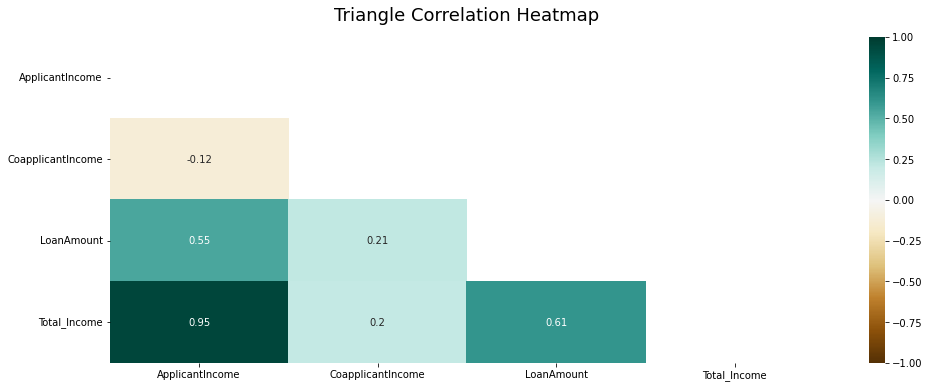

In [29]:
# Graphic plotting
# Upper triangle was hidden for easing the visualization, because it has the same values from the lower one
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)) # Defining the mask to set the values in the upper triangle to True
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16) 

As can be observed in the figure above, the only variables that present a high correlation with each other are total income and application income. The presence of both of them would affect the machine learning models performance negatively with redundant information.

In [30]:
# Remove 'ApplicantIncome' from the data frame
model_inputs = model_inputs.drop(columns='Total_Income')

## 2.6 Dummy Classifiers

In [31]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    'strategy' : ['most_frequent', 'prior', 'stratified', 'uniform']}

# Cross validation
search = GridSearchCV(DummyClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001430,0.000291,0.000634,0.000116,most_frequent,{'strategy': 'most_frequent'},0.72,0.67,0.74,0.69,0.63,0.690,0.038471,1
1,0.001300,0.000039,0.001311,0.001205,prior,{'strategy': 'prior'},0.72,0.67,0.74,0.69,0.63,0.690,0.038471,1
2,0.001532,0.000424,0.000722,0.000037,stratified,{'strategy': 'stratified'},0.58,0.64,0.49,0.54,0.58,0.566,0.049639,3
3,0.002532,0.000844,0.000904,0.000424,uniform,{'strategy': 'uniform'},0.47,0.52,0.49,0.48,0.44,0.480,0.026077,4


In [32]:
# Automate scores showing
def print_score(scores):
  mean = scores.mean() * 100
  deviation = scores.std() * 100
  print("Mean accuracy %.2f" % mean)
  print("Interval [%.2f, %.2f]" % (mean - 2 * deviation, mean + 2 * deviation))

In [33]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 69.00
Interval [61.31, 76.69]
DummyClassifier(strategy='most_frequent')


## 2.3 K neighbors classifier

In [34]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    'n_neighbors' : [30, 40, 50, 60],
    'weights': ['uniform', 'distance'],
    'algorithm': ['kd_tree', 'ball_tree']}

# Following the recomention of cross validation number of splits being between 5 and 10
search = GridSearchCV(KNeighborsClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006789,0.001838,0.012930,0.002679,kd_tree,30,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 30, 'w...",0.72,0.67,0.73,0.63,0.63,0.676,0.042708,11
1,0.009627,0.002598,0.009384,0.002401,kd_tree,30,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 30, 'w...",0.70,0.61,0.70,0.63,0.63,0.654,0.038262,15
2,0.005225,0.000108,0.010697,0.000867,kd_tree,40,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 40, 'w...",0.72,0.67,0.74,0.69,0.63,0.690,0.038471,1
3,0.007151,0.002252,0.007556,0.002244,kd_tree,40,distance,"{'algorithm': 'kd_tree', 'n_neighbors': 40, 'w...",0.71,0.65,0.71,0.66,0.63,0.672,0.032496,13
4,0.009133,0.002551,0.020015,0.007204,kd_tree,50,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 50, 'w...",0.72,0.67,0.74,0.69,0.63,0.690,0.038471,1


In [35]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 67.80
Interval [58.73, 76.87]
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=40)


## 2.4 Gradient Boosting Classifier

In [36]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    'learning_rate' : [1, 5, 10],
    'n_estimators': [100, 200, 300],
    'subsample': [0.1, 0.5, 1.0]}

# Following the recomention of cross validation number of splits being between 5 and 10
search = GridSearchCV(GradientBoostingClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130274,0.053096,0.005307,0.004653,1,100,0.1,"{'learning_rate': 1, 'n_estimators': 100, 'sub...",0.60,0.68,0.57,0.40,0.69,0.588,0.104575,7
1,0.179081,0.076588,0.004803,0.003207,1,100,0.5,"{'learning_rate': 1, 'n_estimators': 100, 'sub...",0.56,0.45,0.73,0.32,0.72,0.556,0.157556,9
2,0.275355,0.057247,0.004016,0.000149,1,100,1.0,"{'learning_rate': 1, 'n_estimators': 100, 'sub...",0.77,0.76,0.79,0.71,0.72,0.750,0.030332,1
3,0.238392,0.086919,0.003473,0.000698,1,200,0.1,"{'learning_rate': 1, 'n_estimators': 200, 'sub...",0.60,0.46,0.56,0.51,0.56,0.538,0.048332,13
4,0.190736,0.010784,0.002681,0.000049,1,200,0.5,"{'learning_rate': 1, 'n_estimators': 200, 'sub...",0.78,0.48,0.69,0.62,0.67,0.648,0.098671,4


In [37]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 74.60
Interval [69.45, 79.75]
GradientBoostingClassifier(learning_rate=1)


## 2.5 X Gradient Boosting Classifier

In [47]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    'max_depth': [2, 3, 5],
    'learning_rate' : [1],
    'n_estimators' : [50, 75, 100],
    'subsample' : [0.1, 0.5, 1.0]}

# Following the recomention of cross validation number of splits being between 5 and 10
search = GridSearchCV(XGBClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020929,0.004148,0.001736,0.000111,1,2,50,0.1,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",0.62,0.74,0.75,0.74,0.60,0.690,0.065727,7
1,0.025577,0.000726,0.001633,0.000112,1,2,50,0.5,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",0.77,0.74,0.77,0.76,0.68,0.744,0.033823,5
2,0.022604,0.001692,0.001659,0.000086,1,2,50,1.0,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",0.82,0.79,0.78,0.73,0.69,0.762,0.046217,1
3,0.026920,0.001956,0.001975,0.000346,1,2,75,0.1,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",0.61,0.68,0.63,0.63,0.60,0.630,0.027568,9
4,0.035808,0.002315,0.002096,0.000375,1,2,75,0.5,"{'learning_rate': 1, 'max_depth': 2, 'n_estima...",0.75,0.76,0.76,0.72,0.75,0.748,0.014697,3


In [49]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 76.20
Interval [65.22, 87.18]
XGBClassifier(learning_rate=1, max_depth=2, n_estimators=50, subsample=1.0)


## 2.3 Decision Tree Classifier

In [50]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    "max_depth" : [2,3,4,5],
    "min_samples_split" : [16, 32, 64],
    "min_samples_leaf" : [16, 32, 64],
    "criterion" : ["gini", "entropy"]}

# Following the recomention of cross validation number of splits being between 5 and 10
search = GridSearchCV(DecisionTreeClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003964,0.002505,0.001648,0.000170,gini,2,32,32,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.86,0.80,0.84,0.82,0.73,0.81,0.044721,1
1,0.002769,0.000519,0.001528,0.000041,gini,2,32,64,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.86,0.80,0.84,0.82,0.73,0.81,0.044721,1
2,0.002520,0.000082,0.001614,0.000080,gini,2,32,128,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.86,0.80,0.84,0.82,0.73,0.81,0.044721,1
3,0.002567,0.000125,0.001524,0.000046,gini,2,64,32,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.72,0.67,0.74,0.69,0.63,0.69,0.038471,25
4,0.002509,0.000041,0.001607,0.000159,gini,2,64,64,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.72,0.67,0.74,0.69,0.63,0.69,0.038471,25


In [51]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 81.00
Interval [72.06, 89.94]
DecisionTreeClassifier(max_depth=2, min_samples_leaf=32, min_samples_split=32)


## 2.5 Random forest classifier

In [52]:
# Garanty standard randomization
np.random.seed(SEED)

# Hiperparameters grid to improve model accuracy
parameters_space = {
    'n_estimators': [50],
    'max_depth' : [2],
    'min_samples_split' : [16, 32, 64],
    'min_samples_leaf' : [16, 32, 64],
    'criterion' : ['gini', 'entropy']}

# Cross validation
search = GridSearchCV(RandomForestClassifier(),
                    parameters_space,
                    cv = KFold(n_splits = 5, shuffle=True))
search.fit(model_inputs, loan_status)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070045,0.004612,0.007222,0.000181,gini,2,32,32,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.76,0.68,0.84,0.80,0.73,0.762,0.055281,3
1,0.139778,0.008352,0.015704,0.004092,gini,2,32,32,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.82,0.67,0.80,0.69,0.63,0.722,0.074673,52
2,0.401773,0.013039,0.033324,0.002535,gini,2,32,32,300,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.81,0.68,0.80,0.71,0.66,0.732,0.061774,36
3,0.069226,0.003973,0.008035,0.001161,gini,2,32,64,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.86,0.77,0.80,0.69,0.67,0.758,0.070257,6
4,0.131531,0.003912,0.014674,0.003398,gini,2,32,64,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.76,0.77,0.84,0.71,0.68,0.752,0.054918,9


In [53]:
# Garanty standard randomization
np.random.seed(SEED)

# Verify cross validated results
scores = cross_val_score(search, model_inputs, loan_status, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

# Check the best hiperparameters found
best = search.best_estimator_
print(best)

Mean accuracy 74.20
Interval [60.26, 88.14]
RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=32,
                       min_samples_split=32, n_estimators=50)


As it could be noticed, the model with best accuracy was the Decision Tree Classifier. Therefore, it was chosen for being used to predict the customers's loan status.